In [2]:
import numpy as np
import matplotlib.pyplot as plt
import MDSplus as mds
import os

  The MDSplus python module version (HEAD_release_7.139.59) does not match
  the version of the installed MDSplus libraries (unknown_release_0.0.0).
  Upgrade the module using the mdsplus/python/MDSplus directory of the
  MDSplus installation or set PYTHONPATH=/usr/local/mdsplus/python.


In [ ]:
# path on d3dpcs2
# d3pcs2_path = '/mdsdata/mds'

In [3]:
os.environ['d3dpcs_path'] = '/fusion/projects/codes/pcs/data/ptdata/simdata/mds'

In [4]:
!echo $d3dpcs_path

/fusion/projects/codes/pcs/data/ptdata/simdata/mds


In [ ]:
t = mds.Tree("d3dpcs",913129)
print(t.tdiExecute('PTDATA2("PCF1A",913129)'))

# (<built-in function print>, Build_Signal(Set_Range(32000,0. /*** etc. ***/), *, Build_Dim(*, Build_With_Units(Set_Range(32000,-5000. /*** etc. ***/), "ms"))))


Build_Signal(Set_Range(32000,0. /*** etc. ***/), *, Build_Dim(*, Build_With_Units(Set_Range(32000,-5000. /*** etc. ***/), "ms")))


In [11]:

#export d3dpcs
#export d3dpcs_path=/fusion/projects/codes/pcs/data/ptdata/simdata/mds
# /fusion/projects/codes/pcs/data/ptdata/simdata

connection = mds.Connection('localhost')


Error in connect to service
send_bytes: Error sending data to remote server: Broken pipe
Error during login: send: Broken pipe


MdsIpException: %MDSPLUS-E-Unknown, Error connecting to localhost

In [9]:
shotn = 913129
connection.openTree('d3dpcs', shotn)

TreeNOPATH: %TREE-E-NOPATH, No 'treename'_path or default_tree_path environment variables defined. Cannot locate tree files.

In [9]:
# mds.DIM_OF(f'PTDATA(\'CKXOUT\', {shotn})')

In [10]:
cakenn = connection.get(f'PTDATA(\'CKXOUT\', {shotn})')
cakenn

Set_Range(487830,0. /*** etc. ***/)

In [12]:
data = connection.get(f'DIM_OF(PTDATA(\'CKXOUT\', {shotn}))')
data

Set_Range(487830,100. /*** etc. ***/)

In [17]:
data.data().shape

(487830,)

In [14]:
(6980 - 100)/20

344.0

In [25]:
data.data()[300:500]

array([6100.    , 6120.    , 6140.    , 6160.    , 6180.    , 6200.    ,
       6220.    , 6240.    , 6259.9995, 6280.    , 6300.    , 6320.    ,
       6340.    , 6360.    , 6380.    , 6400.    , 6420.    , 6440.    ,
       6460.    , 6480.    , 6500.    , 6520.    , 6540.    , 6560.    ,
       6580.    , 6600.    , 6620.    , 6640.    , 6660.    , 6680.    ,
       6700.    , 6720.    , 6740.    , 6759.9995, 6780.    , 6800.    ,
       6820.    , 6840.    , 6860.    , 6880.    , 6900.    , 6920.    ,
       6940.    , 6960.    , 6980.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    , 

In [11]:
NYMODEL = 2
NYOUT_PTS = 101
NYPROF = 7

prof_data = cakenn.reshape((-1, NYMODEL, NYOUT_PTS, NYPROF))

dens_profiles = prof_data[:, 1, :, 3]  # 3-- for density || 6 for rotation
rot_profiles = prof_data[:, 1, :, 6]
q_profiles = prof_data[:, 1, :, 2]
pres_profiles = prof_data[:, 1, :, 0]
etemp_profiles = prof_data[:, 1, :, 4]

dens_profiles.shape, rot_profiles.shape, q_profiles.shape, pres_profiles.shape, etemp_profiles.shape


((345, 101), (345, 101), (345, 101), (345, 101), (345, 101))

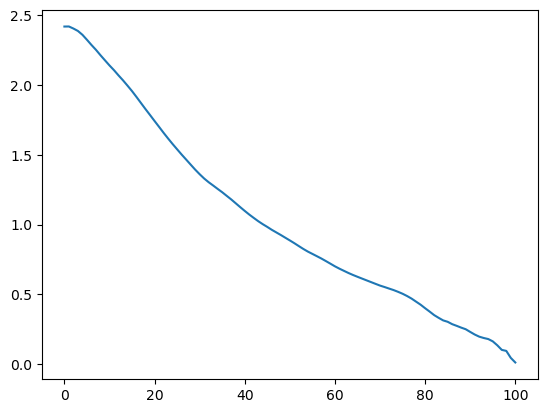

In [20]:
plt.plot(etemp_profiles[50,:])

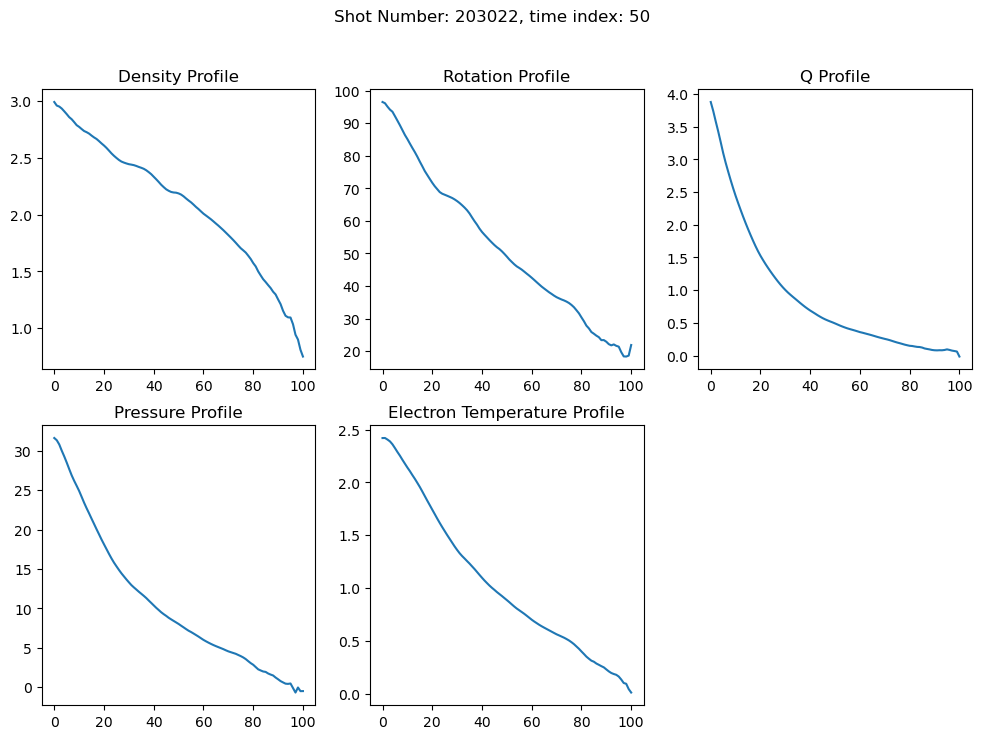

In [21]:
# make a plot with all profiles
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.plot(dens_profiles[50, :])
plt.title('Density Profile')
plt.subplot(2, 3, 2)
plt.plot(rot_profiles[50, :])
plt.title('Rotation Profile')
plt.subplot(2, 3, 3)
plt.plot(q_profiles[50, :])
plt.title('Q Profile')
plt.subplot(2, 3, 4)
plt.plot(pres_profiles[50, :])
plt.title('Pressure Profile')
plt.subplot(2, 3, 5)
plt.plot(etemp_profiles[50, :])
plt.title('Electron Temperature Profile')
# plt.tight_layout()
plt.suptitle(f'Shot Number: {shotn}, time index: 50')
plt.show()


In [ ]:
#Sean Flanagan. - flanagan@fusion.gat.com
# Martin. - margomw@fusion.gat.com